<a href="https://colab.research.google.com/github/qdgiang/AI-project/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare stuffs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
%%shell 
FILEID="1iD-XrGmzvNFtQuk1HlxgbEBJqkFXBFPR"
FILENAME="fashion-MNIST"
cd /content
rm -f -r "FILENAME" "$FILENAME".zip
gdown -q --id $FILEID --output "$FILENAME".zip
unzip -q "$FILENAME".zip
rm -f settings.txt
printf "FILENAME=$FILENAME\n" >> settings.txt
printf "WORKINGSPACE=/content/$FILENAME\n" >> settings.txt
echo "Dataset prepared!"

Dataset prepared!


In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 150
#For standardising the data
from sklearn.preprocessing import StandardScaler

bruh = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
# Fashion MNIST reader
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('./fashion-MNIST', kind='train')
print('Extraction completed!')

Extraction completed!


In [5]:
X_train.shape

(60000, 784)

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            #PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal(),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
    plt.savefig('early_view.png')

In [8]:
# Subset first 20k data points to visualize
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


# PCA only

In [9]:
time_start = time.time()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(x_subset)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 2.979058265686035 seconds


In [10]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864 0.03825119 0.03386233
 0.02317081 0.01925846 0.01358944 0.0133008  0.01001877 0.00907192
 0.00763252 0.00662158 0.00613104 0.00596658 0.00548318 0.00528067
 0.00458594 0.00448085 0.00438743 0.00411274 0.00386732 0.00368856
 0.00368337 0.00350791 0.00333909 0.00319267 0.00310718 0.00289853
 0.00276914 0.00263274 0.00261323 0.00256556 0.0024898  0.0023784
 0.00231467 0.00225584 0.00219102 0.00211546 0.00200757 0.00197085
 0.00194082 0.00184649 0.00176581 0.00172857 0.00166474 0.00163073
 0.00161735 0.00153961]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664224554, -689.6949155554852, '0'),
  Text(42.86381926006835, -1429.3643908454537, '1'),
  Text(1098.284332649496, 376.9753232998619, '2'),
  Text(329.27198606834975, -1111.489809076406, '3'),
  Text(1266.970986825563, 295.46620084121406, '4'),
  Text(-1589.5573233918287, 61.86773394281134, '5'),
  Text(713.4727983677969, -65.687011222454, '6'),
  Text(-1521.4109429505704, 335.665625313217, '7'),
  Text(63.81768171669648, 1003.3250404600504, '8'),
  Text(-645.6906091269365, 1168.2384038910009, '9')])

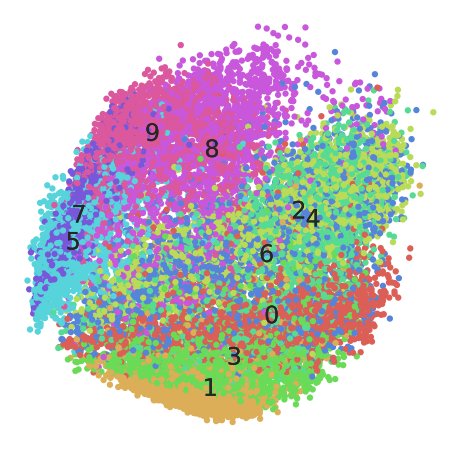

In [11]:
top_two_comp = pca_df[['pca1','pca2']] 
fashion_scatter(top_two_comp.values,y_subset)
#fashion_scatter(pca_df,y_subset) 

In [ ]:
time_start = time.time()
fashion_tsne = SNE(random_state=RS).fit_transform(x_subset)
print('SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# t-SNE only

In [14]:
time_start = time.time()
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 942.3801348209381 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-24.940342, -22.950132, '0'),
  Text(-62.42249, -15.882853, '1'),
  Text(8.852205, 29.194828, '2'),
  Text(-42.09028, 13.800543, '3'),
  Text(-3.7711926, 42.727234, '4'),
  Text(18.133549, -32.50606, '5'),
  Text(-1.4885285, 15.711243, '6'),
  Text(9.879349, -58.34947, '7'),
  Text(38.100693, 37.09302, '8'),
  Text(49.5673, -17.981304, '9')])

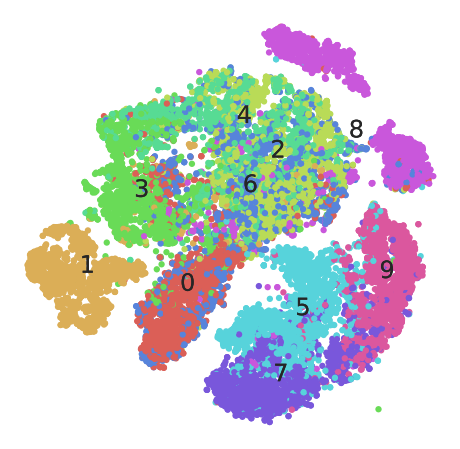

In [15]:
fashion_scatter(fashion_tsne, y_subset)

# PCA + t-SNE

In [12]:
time_start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.854902744293213 seconds
Cumulative variance explained by 50 principal components: 0.862517296580602


In [ ]:
time_start = time.time()
fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)
test_tsne = TSNE(n_components = 3, perplexity = 50, early_exaggeration = 20, n_iter = 1500)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 235.05622577667236 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-39.076363, 43.740215, '0'),
  Text(-51.326138, -30.607824, '1'),
  Text(20.292591, 19.793762, '2'),
  Text(-39.4436, 5.0263376, '3'),
  Text(12.178382, 4.869296, '4'),
  Text(15.996458, -31.851608, '5'),
  Text(1.5672276, 27.709564, '6'),
  Text(-2.3383095, -58.113403, '7'),
  Text(13.956217, 62.46608, '8'),
  Text(55.524975, -33.747, '9')])

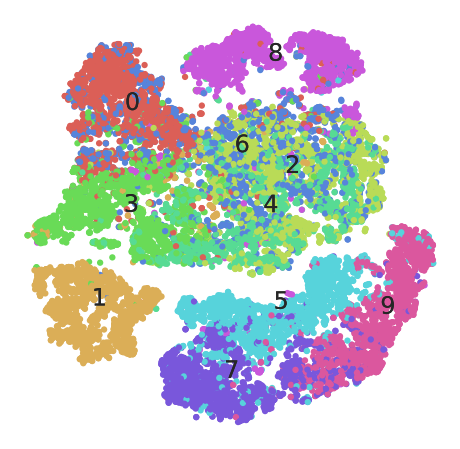

In [ ]:
fashion_scatter(fashion_pca_tsne, y_subset)

# UMAP

In [13]:
pip install umap-learn

     |████████████████████████████████| 80 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 11.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=71df52fa7f5a20b7f78eec165917bb6f98148922d11d8911058ac4450d48d8e9
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=56c65eafc5d9933a527cd9c7630615a74820d959b0a4911865cf5a021ee16f27
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import umap

clothes = pd.read_csv('/content/gdrive/Shareddrives/Working Stuff/Fashion-MNIST/fashion-mnist_train.csv')

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(clothes.iloc[:20000, 1:])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


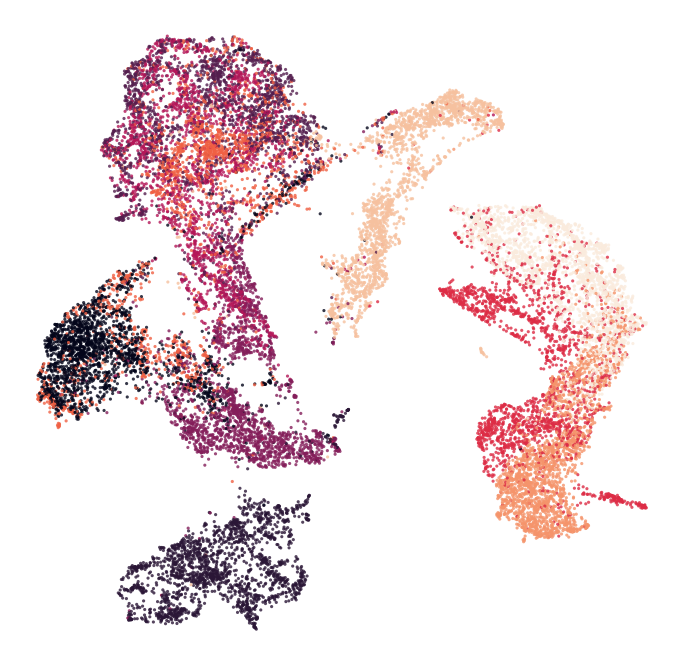

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.scatter(embedding[:20000, 0], embedding[:20000, 1], 
            c=clothes.iloc[:20000, 0], 
            edgecolor='none', 
            alpha=0.80, 
            s=10)
plt.axis('off');

In [ ]:
time_start = time.time()
fashion_umap = umap.UMAP().fit_transform(x_subset)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 24.247642040252686 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-2.1502385, 5.5844636, '0'),
  Text(0.21607883, -2.6964598, '1'),
  Text(0.31615537, 11.646126, '2'),
  Text(-0.39293572, 4.3406005, '3'),
  Text(-1.0397792, 11.16667, '4'),
  Text(9.629461, 2.5926094, '5'),
  Text(-0.13216779, 9.469804, '6'),
  Text(11.454178, 1.0737896, '7'),
  Text(5.384076, 11.710832, '8'),
  Text(10.422955, 5.88658, '9')])

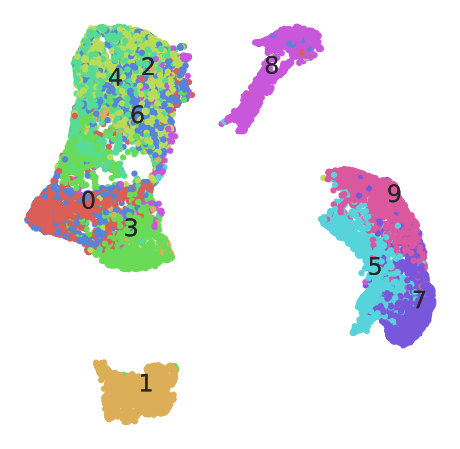

In [ ]:
fashion_scatter(fashion_umap, y_subset)

# Freestyle testing

In [ ]:
y_train.view()

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_df_org = pd.read_csv('/content/drive/Shareddrives/Working Stuff/Fashion-MNIST/fashion-mnist_test.csv')

In [ ]:
train_df_for_tsne = StandardScaler().fit_transform(train_df_org)
train_df_org_label = train_df_org['label']

In [ ]:
train_df_org.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...        31         0         0         0
3      2       0       0       0  ...       222        56         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
tsne = TSNE(n_components=2, random_state=0, early_exaggeration=50)
mnist_tsne = tsne.fit_transform(train_df_for_tsne)

mnist_tsne_1 = np.vstack((mnist_tsne.T, train_df_org_label)).T
tsne_df = pd.DataFrame(data=mnist_tsne_1, columns=('Dim_1', 'Dim_2', 'Label'))

tsne_df.head()

Dim_1      Dim_2  Label
0  56.579765 -18.355425    0.0
1  76.076218  50.996220    1.0
2  -3.975500  -3.695599    2.0
3 -23.417822  17.417309    2.0
4  25.029116  48.696907    3.0

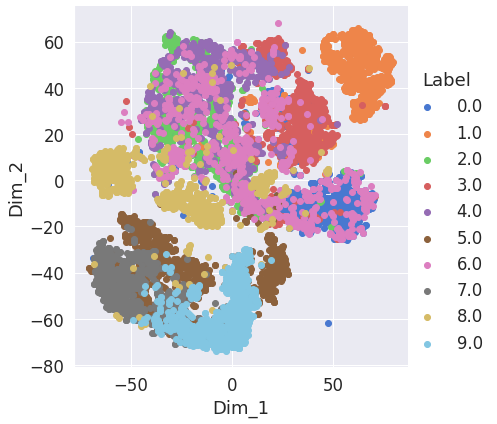

In [ ]:
sns.FacetGrid(tsne_df, hue='Label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
sns.set_title = "Early exaageration = 50"
plt.show()

In [ ]:
import plotly.graph_objects as go
plt.rcParams['image.cmap'] = 'gray'
color = ['#6388b4', '#ffae34', '#ef6f6a', '#8cc2ca', '#55ad89', '#c3bc3f', '#bb7693', '#baa094', '#a9b5ae', '#767676']
mnist_df_without_label = train_df_org.drop(['label'], axis=1)
mnist_tsne_2 = tsne.fit_transform(mnist_df_without_label, train_df_org_label)
fig = go.Figure()
for idx in range(10):
    fig.add_trace(go.Scatter(
        x = mnist_tsne_2[:, 0][train_df_org_label==idx],
        y = mnist_tsne_2[:, 1][train_df_org_label == idx],
        name=str(idx),
        opacity=0.6,
        mode='markers',
        marker=dict(color=color[idx])
    ))
fig.update_layout(
    width=800,
    height=800,
    title='T-SNE on MNIST',
    yaxis = dict(
        scaleanchor = 'x',
        scaleratio = 1
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)
fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
%matplotlib inline 

In [ ]:
from PIL import Image
import numpy as np
data = np.zeros( (512,512,3), dtype=np.uint8)
data[256,256] = [100,200,0]
plt.imshow(data, interpolation='nearest')
plt.show()

NameError: ignored

In [ ]:
from PIL import Image as im
import numpy as np
# define a main function
def main():
  
    # create a numpy array from scratch
    # using arange function.
    # 1024x720 = 737280 is the amount 
    # of pixels.
    # np.uint8 is a data type containing
    # numbers ranging from 0 to 255 
    # and no non-negative integers
    array = np.arange(0, 737280, 1, np.uint8)
      
    # check type of array
    print(type(array))
      
    # our array will be of width 
    # 737280 pixels That means it 
    # will be a long dark line
    print(array.shape)
      
    # Reshape the array into a 
    # familiar resoluition
    array = np.reshape(array, (1024, 720))
      
    # show the shape of the array
    print(array.shape)
  
    # show the array
    print(array)
      
    # creating image object of
    # above array
    data = im.fromarray(array)
      
    # saving the final output 
    # as a PNG file
    data.save('gfg_dummy_pic.png')
  
# driver code
if __name__ == "__main__":
    
  # function call
  main()

<class 'numpy.ndarray'>
(737280,)
(1024, 720)
[[  0   1   2 ... 205 206 207]
 [208 209 210 ... 157 158 159]
 [160 161 162 ... 109 110 111]
 ...
 [144 145 146 ...  93  94  95]
 [ 96  97  98 ...  45  46  47]
 [ 48  49  50 ... 253 254 255]]


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Working Stuff/Fashion-MNIST/fashion-mnist_test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df[:1000]

In [ ]:
label = df.label
df.drop("label", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(1000, 784)

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=30, early_exaggeration= 100, learning_rate=200, n_iter=1000)
reduced_data = model.fit_transform(standardized_data)

In [ ]:
reduced_df = np.vstack((reduced_data.T, label)).T
reduced_df = pd.DataFrame(data=reduced_df, columns=["X", "Y", "label"])
reduced_df.label = reduced_df.label.astype(np.int)
reduced_df.head()

X          Y  label
0   5.796492   0.627667      0
1 -17.658003 -27.794804      1
2  -5.629303  15.659775      2
3  25.347839  -9.910229      2
4  27.414648  15.584462      3

In [ ]:
import seaborn as sns
reduced_df.dtypes

X        float64
Y        float64
label      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


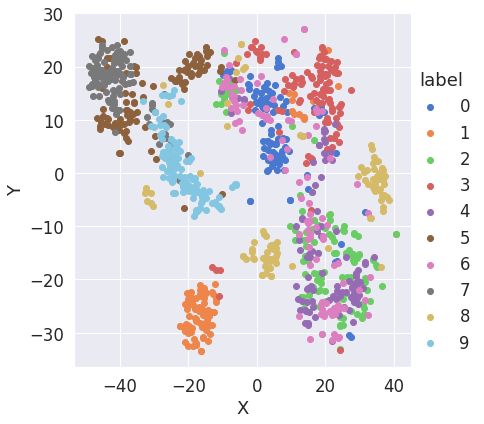

In [ ]:
g = sns.FacetGrid(reduced_df, hue='label', size=6).map(plt.scatter, 'X', 'Y').add_legend()

In [ ]:
train=  pd.read_csv('/content/drive/Shareddrives/Working Stuff/Fashion-MNIST/fashion-mnist_train.csv')
test=  pd.read_csv('/content/drive/Shareddrives/Working Stuff/Fashion-MNIST/fashion-mnist_test.csv')

In [ ]:
train.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      2       0       0       0  ...         0         0         0         0
1      9       0       0       0  ...         0         0         0         0
2      6       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

print(x.shape)
print(y)

(60000, 784)
[2 9 6 ... 8 8 7]


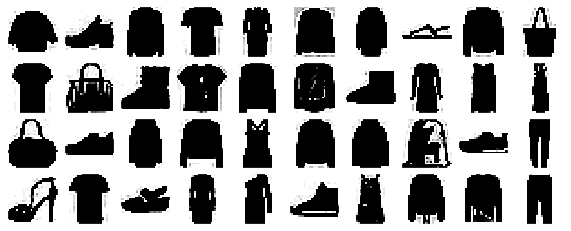

In [ ]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [ ]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [ ]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:5000]
y_subset = y[0:5000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


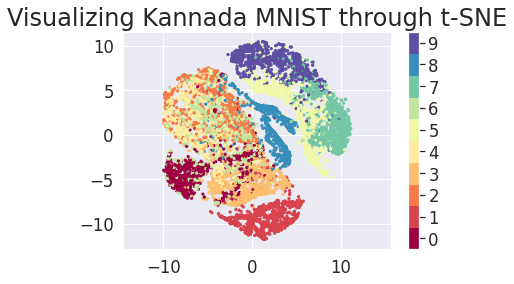

In [ ]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

In [ ]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [ ]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, early_exaggeration=100, n_iter=1000).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 13.4 µs


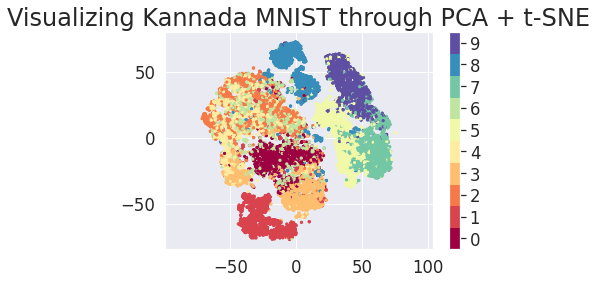

In [ ]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA + t-SNE', fontsize=24);

# Improved plot of clustering map

In [ ]:
# Encoding all the images for inclusion in a dataframe.

from io import BytesIO
from PIL import Image
import base64


def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((28,28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [ ]:
# loading up bokeh and other tools to generate a suitable interactive plot.

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
# Generating the plot itself with a custom hover tooltip 

x_subset_reshape = x_subset.reshape(-1,28,28)

digits_df = pd.DataFrame(pca_tsne, columns=('x', 'y'))
#digits_df = pd.DataFrame(tsne, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in y_subset]
digits_df['image'] = list(map(embeddable_image, x_subset_reshape))


datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in y_subset],
                                       palette=Spectral10)

plot_figure = figure(
    title='t-SNE projection of the Kannada MNIST dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 30px 30px 30px 30px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Clothes:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4,
    legend_group = 'digit'
)
show(plot_figure)

bruh = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]